In [1]:
import os 
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import rasterio 
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 12,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

PatchIDs:

-122.1916_47.9500-20190804 

-122.3818_47.1388-20190804

-59.0502_-28.5390-20190919

-93.3191_30.1659-20190320

159.0764_53.9727-20190518

In [3]:
color_legend = {
    0: (125, 125, 125),
    1: (65, 155, 223),
    2: (57, 125, 73),
    3: (136, 176, 83),
    4: (122, 135, 198),
    5: (228, 150, 53),
    6: (223, 195, 90),
    7: (196, 40, 27),
    8: (165, 155, 143),
    9: (179, 159, 225),
    10: (205, 205, 205)
}

class_names = {
    0:"No data",
    1: "Water",
    2: "Trees",
    3: "Grass",
    4: "Flooded Vegetation",
    5: "Crops",
    6: "Scrub",
    7: "Built Area",
    8: "Bare Ground",
    9: "Snow/Ice",
    10: "Cloud"
}

In [72]:
metadata_path = r'E:\Thesis\data\small\meta_patches.csv'

label_path = r"E:\Thesis\data\small\l1c\test"
feat_path = r"E:\Thesis\data\small\l1c\test"
plots_path = r'E:\Thesis\outputs\00_charts\plots'
path = r'E:\Thesis\outputs\01_finalised_models'
modelbasenames = [
    '44946_20240524_s2_scratch',
    '45091_20240529_siam_18_scratch',
    '44948_20240524_siam_33_scratch',
    '44949_20240524_siam_48_scratch',
    '44975_20240525_siam_96_scratch',
    '44993_20240526_s2_siam_96_scratch',

    '44961_20240524_single_recon_fe',
    '44996_20240527_single_segsiam_fe',
    '45142_20240530_dual_fe',

    '45489_20240607_single_recon_ft',
    '45000_20240527_single_segsiam_ft',
    '45452_20240606_dual_ft'
]

modeltitle = ['MS Input - Scratch','SIAM - 18 - Scratch','SIAM - 33 - Scratch',
              'SIAM - 48 - Scratch','SIAM - 96 - Scratch','Combo Input- Scratch',
              'Reconst.- FE','SIAM Seg - FE','Dual - FE',
                'Reconst. - FT','SIAM Seg - FT','Dual - FT']




In [56]:
# feats sample: l1c_csl_0.6441_5.8141-20190305_feats.tif
# labels sample: l1c_csl_0.6441_5.8141-20190305_label.tif
# -122.1916_47.9500-20190804 

# -122.3818_47.1388-20190804

# -59.0502_-28.5390-20190919

# -93.3191_30.1659-20190320

# 159.0764_53.9727-20190518

# for each of the patcches above, following are the feats, labels, prediction filenames
data_path = r'E:\Thesis\data\small\l1c\test'
feats = ['l1c_csl_-122.1916_47.9500-20190804_feats.tif', 'l1c_csl_-122.3818_47.1388-20190804_feats.tif', 
         'l1c_csl_-59.0502_-28.5390-20190919_feats.tif', 'l1c_csl_-93.3191_30.1659-20190320_feats.tif', 
         'l1c_csl_159.0764_53.9727-20190518_feats.tif']

labels = ['l1c_csl_-122.1916_47.9500-20190804_label.tif', 'l1c_csl_-122.3818_47.1388-20190804_label.tif', 
          'l1c_csl_-59.0502_-28.5390-20190919_label.tif', 'l1c_csl_-93.3191_30.1659-20190320_label.tif', 
          'l1c_csl_159.0764_53.9727-20190518_label.tif']

preds= ['-122.1916_47.9500-20190804.png', '-122.3818_47.1388-20190804.png',
         '-59.0502_-28.5390-20190919.png', '-93.3191_30.1659-20190320.png',
         '159.0764_53.9727-20190518.png']

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio

def cmap_norm(color_legend):
    cmap = plt.cm.colors.ListedColormap([np.array(color_legend[i]) / 255 for i in color_legend.keys()])
    bounds = list(color_legend.keys())
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm

def load_rgb(filepath):
    with rasterio.open(filepath) as src:
        return src.read([3, 2, 1]).astype(np.float32) / 1700

def load_label(filepath):
    with rasterio.open(filepath) as src:
        return src.read(7)

def load_prediction(filepath):
    with rasterio.open(filepath) as src:
        return src.read(1)

def plot_per_patch(feat, label, pred, modelbasenames, color_legend, title, data_path, path):
    fig, ax = plt.subplots(3, 6, figsize=(20, 10))
    rgb = load_rgb(os.path.join(data_path, feat))
    label = load_label(os.path.join(data_path, label))
    bounds = list(color_legend.keys())
    cmap, norm = cmap_norm(color_legend)
    sm=plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    
    ax[0, 0].imshow(np.transpose(rgb, (1, 2, 0)))  # Transpose the RGB array
    ax[0, 0].set_title("RGB")
    ax[0, 0].axis("off")
    
    ax[0, 1].imshow(label, cmap=cmap, norm=norm)
    ax[0, 1].set_title("Label")
    ax[0, 1].axis("off")
    for i in ax[0]:
        i.axis("off")
    
    for i, model in enumerate(modelbasenames[:6]):
        prediction = load_prediction(os.path.join(path, model, 'model_outputs', 'predictions', pred))
        ax[1, i].imshow(prediction, cmap=cmap, norm=norm)
        ax[1, i].set_title(f"{modeltitle[i]}")
        ax[1, i].axis("off")
    
    for i, model in enumerate(modelbasenames[6:]):
        prediction = load_prediction(os.path.join(path, model, 'model_outputs', 'predictions', pred))
        ax[2, i].imshow(prediction, cmap=cmap, norm=norm)
        ax[2, i].set_title(f"{modeltitle[i+6]}")
        ax[2, i].axis("off")
    
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', drawedges= True, spacing = 'uniform', boundaries = bounds.append(11),
                        ticks=[i + 0.5 for i in color_legend.keys()], shrink = 0.25, pad =0.03,aspect = 10)
    
    #cbar.set_ticks([i + 0.5 for i in color_legend.keys()])
    cbar.set_ticklabels([class_names[i] for i in color_legend.keys()])

    save_path = os.path.join(path,f'patch_{pred.replace(".png", "")}.png' )
    plt.savefig(save_path, dpi=1080, bbox_inches="tight", pad_inches=0.2)
    plt.show()

# Example usage
# plot_per_patch(feats[0], labels[0], modelbasenames, color_legend, data_path, path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


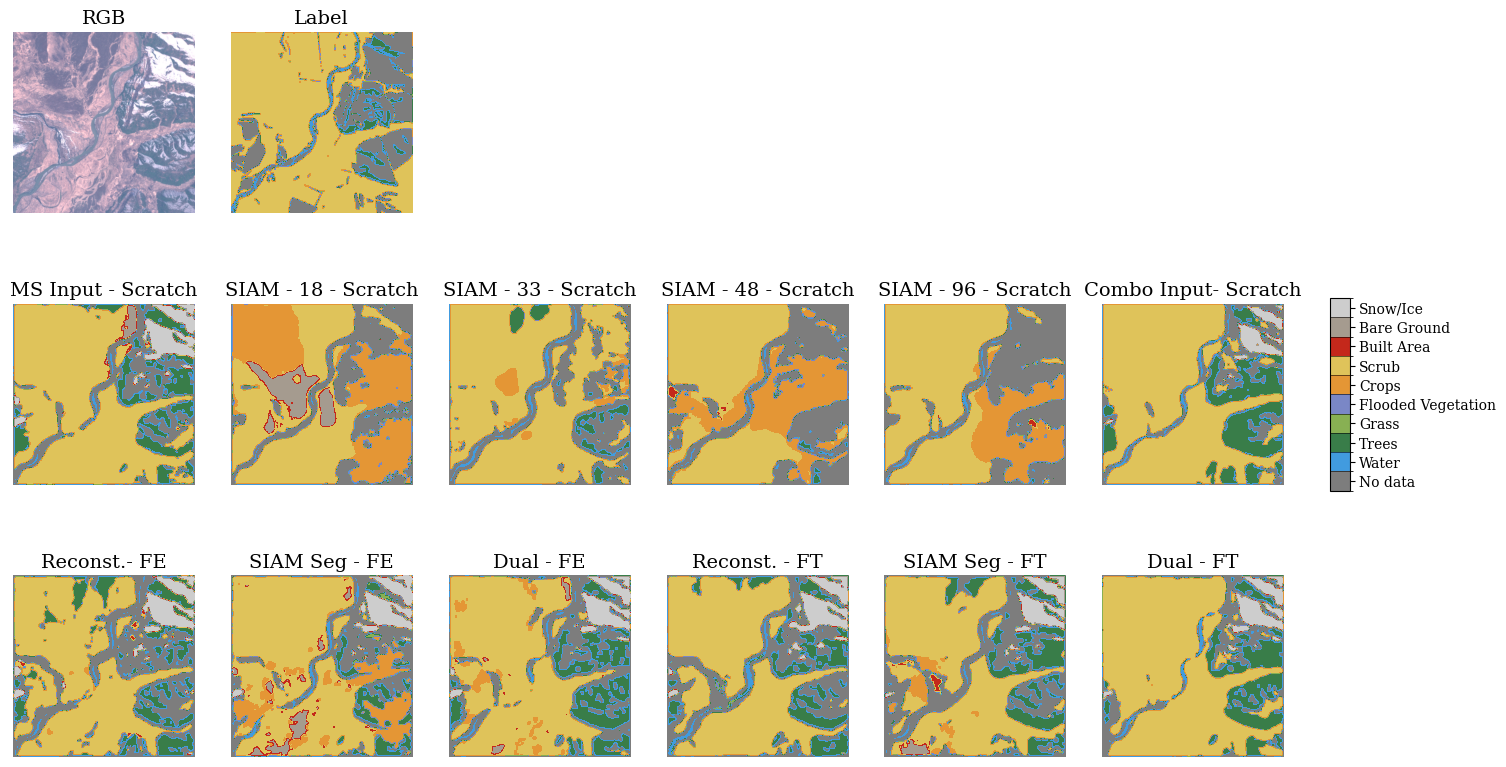

In [79]:
k=4
plot_per_patch(feats[k], labels[k], preds[k], modelbasenames, color_legend,modeltitle, data_path, path)
